In [1]:
import random
import numpy as np
import os
import pandas as pd
import cv2
import pickle
import pprint
import ast
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score


# Preprocessing

In [2]:
#loading class labels
with open('./state-farm-distracted-driver-detection/class_labels.txt') as file:
    class_data = file.read()

class_labels = ast.literal_eval(class_data)
pprint.pprint(class_labels)


{'c0': 'Safe driving',
 'c1': 'Texting - right',
 'c2': 'Talking on the phone - right',
 'c3': 'Texting - left',
 'c4': 'Talking on the phone - left',
 'c5': 'Operating the radio',
 'c6': 'Drinking',
 'c7': 'Reaching behind',
 'c8': 'Hair and makeup',
 'c9': 'Talking to passenger'}


In [3]:
#loading in the data
features = pickle.load(open('./state-farm-distracted-driver-detection/featureData64.pkl','rb'))
target = pickle.load(open('./state-farm-distracted-driver-detection/targetData64.pkl','rb'))

print('Data Size: ', len(features))

Data Size:  22424


In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(features), np.array(target), test_size=0.2, random_state=42)
x_train = np.reshape(X_train, (X_train.shape[0], -1))
x_test = np.reshape(X_test, (X_test.shape[0], -1))
print('Training data shape: ', x_train.shape)
print('Validation data shape: ', x_test.shape)

Training data shape:  (17939, 12288)
Validation data shape:  (4485, 12288)


# Models

In [5]:
#Importing models
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [6]:
def calc_accuracy1( model, x, y):
    y_pred = model.predict(x)
    return accuracy_score(y, y_pred)

## Support Vector Machine

In [7]:
svm = SVC(kernel = 'linear', probability = True, random_state=10)
svm.fit(x_train,y_train)

SVC(kernel='linear', probability=True, random_state=10)

In [8]:
# #saving the model
# pickle.dump(svm, open('./Trained Models/Scikit-Learn/svmModel.pkl','wb'))

### Loading saved model

In [7]:
svm_load = pickle.load(open('./Trained Models/Scikit-Learn/svmModel.pkl','rb'))

### Test Set Accuracy

In [8]:
#Testing Accuracy on text set
svm_pred = svm_load.predict(x_test)

svm_test_accuracy = round(accuracy_score(y_test, svm_pred)*100,2)
print('Linear SVM Test Accuracy: ', svm_test_accuracy,'%')

Linear SVM Test Accuracy:  99.4 %


## Decision Tree Classifier

### Defining and trainig the Model

In [ ]:
decisionTree = DecisionTreeClassifier(random_state=10)
decisionTree.fit(x_train, y_train)

In [ ]:
# #saving the model
# pickle.dump(decisionTree, open('./Trained Models/Scikit-Learn/decisionTreemodel.pkl','wb'))

### Loading saved model

In [9]:
dtree_load = pickle.load(open('./Trained Models/Scikit-Learn/decisionTreemodel.pkl','rb'))

### Test set Accuracy

In [10]:
#Testing Accuracy on text set
dtree_pred = dtree_load.predict(x_test)

dtree_test_accuracy = round(accuracy_score(y_test, dtree_pred)*100,2)
print('Decision Tree Test Accuracy: ', dtree_test_accuracy,'%')

Decision Tree Test Accuracy:  86.27 %


## Naive bayes

### Defining model and training the model

In [21]:
naiveBayes = GaussianNB() 
naiveBayes.fit(x_train, y_train)

GaussianNB()

In [22]:
# #saving the model
pickle.dump(naiveBayes, open('./Trained Models/Scikit-Learn/naiveBayesmodel.pkl','wb'))

### Loading saved models

In [23]:
naivebayes_load = pickle.load(open('./Trained Models/Scikit-Learn/naiveBayesmodel.pkl','rb'))

### Test set Accuracy

In [24]:
#Testing Accuracy on text set
nb_pred = naivebayes_load.predict(x_test)

nb_test_accuracy = round(accuracy_score(y_test, nb_pred)*100,2)
print('Naive Bayes Test Accuracy: ', nb_test_accuracy,'%')

Naive Bayes Test Accuracy:  56.25 %


# Inferences

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get the names of the ten classes
classes = class_labels.keys()

## Heatmap Visualization

In [26]:
def heatmap(y, y_pred, classes, axis, title):
    conf_mat = confusion_matrix(y, y_pred)
    sns.heatmap(
        conf_mat, 
        annot=True, 
        square=True, 
        xticklabels=classes, 
        yticklabels=classes,
        fmt='d', 
        cmap=plt.cm.Blues,
        cbar=False,
        ax=axis
    )
    axis.set_title(title, fontsize=16)
    axis.set_xticklabels(axis.get_xticklabels(), rotation=45, ha="right")
    axis.set_ylabel('True Label', fontsize=12)
    axis.set_xlabel('Predicted Label', fontsize=12)


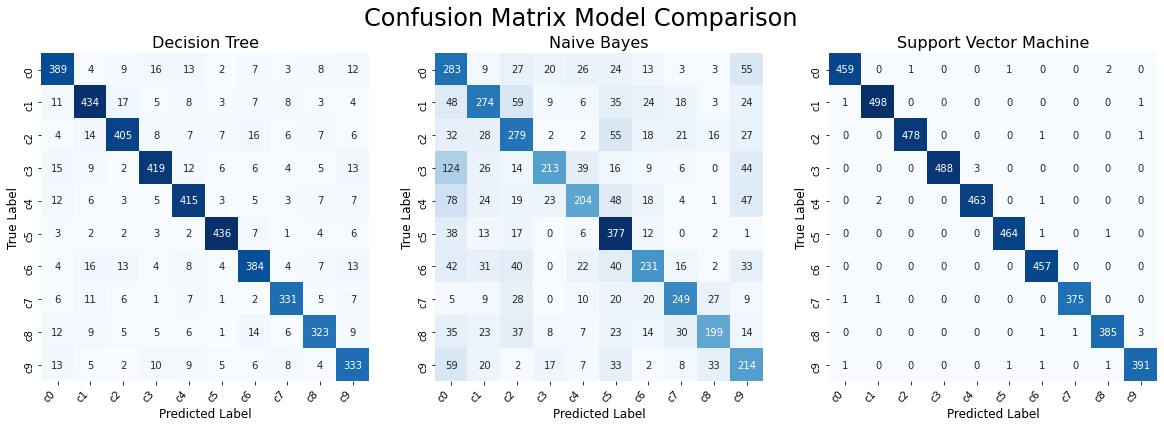

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle("Confusion Matrix Model Comparison", fontsize=24)

heatmap(y_test, svm_pred, classes, ax3, title="Support Vector Machine")  
heatmap(y_test, dtree_pred, classes, ax1, title="Decision Tree")    
heatmap(y_test, nb_pred, classes, ax2, title="Naive Bayes")      


fig.subplots_adjust(top=1.25)
plt.show()

## Classification Report

In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score

#function to generate precision, recall and f-1 scores
def generate_scores(y_true, y_pred):
    scores_dict = {'precision': precision_score(y_true, y_pred, average='weighted'), 
                  'recall': recall_score(y_true, y_pred, average='weighted'), 
                  'f1': f1_score(y_true, y_pred, average='weighted')}
    return scores_dict


In [58]:
class_rep = {'SVM':generate_scores(y_test,svm_pred),
          'DecisionTree':generate_scores(y_test,dtree_pred),
          'NaiveBayes':generate_scores(y_test,nb_pred)}
class_rep = pd.DataFrame(class_rep)
class_rep

,SVM,DecisionTree,NaiveBayes
precision,0.993991,0.863022,0.590908
recall,0.993980,0.862653,0.562542
f1,0.993981,0.862667,0.563245


In [59]:
report = pd.read_csv('./Trained Models/classificationReport.csv', index_col =0)

In [60]:
report

,CNN,VGG16,ResNet50
precision,0.976310,0.958484,0.986252
recall,0.975697,0.957637,0.986176
f1,0.975747,0.957817,0.986152


In [72]:
final_report = class_rep.merge(report, how='inner', on=class_rep.index, left_index=True).iloc[:,1:]
final_report

,SVM,DecisionTree,NaiveBayes,CNN,VGG16,ResNet50
precision,0.993991,0.863022,0.590908,0.976310,0.958484,0.986252
recall,0.993980,0.862653,0.562542,0.975697,0.957637,0.986176
f1,0.993981,0.862667,0.563245,0.975747,0.957817,0.986152


## Image Prediction Visualization

In [82]:
testpred_dict2 = {'Original': y_test,
                  'SVM':svm_pred,
                 'Decision Tree':dtree_pred,
                 'Naive Bayes':nb_pred}



Shape of our images:  (128, 128, 3)


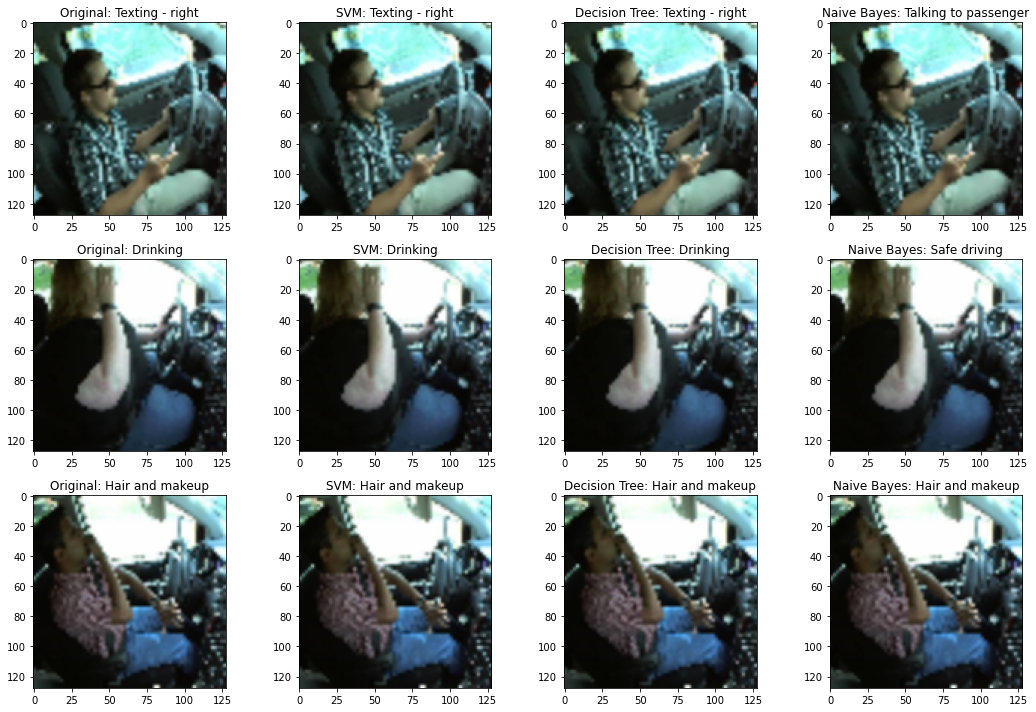

In [92]:
#Visualizing 3 random images from the dataset and their classes
random.seed(40)
sample_idx = random.sample(range(1, len(X_test)),3)

print('Shape of our images: ',np.shape(cv2.resize(X_test[sample_idx[0]],(128,128))))

fig, ax = plt.subplots(3,4, figsize=(15,10))
i=0
for idx in sample_idx:
    ori_image = X_test[idx].astype(np.uint8) 
    j=0
    for model_name, testset in testpred_dict2.items():
        im = ori_image
        im_class = class_labels['c'+ str(testset[idx])]
        ax[i][j].imshow(cv2.cvtColor(cv2.resize(im,(128,128)), cv2.COLOR_BGR2RGB))
        ax[i][j].set_title(model_name+': '+im_class)
        j+=1
    i+= 1
plt.tight_layout()